In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import math
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH AM/PM)
`season` | Season (spring, summer, fall, winter)
`holiday` | Whether day is a holiday or not (Yes or No)
`workingday` | Whether day is a working day or not (Yes or No)
`weather`| Weather condition (Clear or partly cloudy, Mist, Light snow or rain, heavy rain/ice pellets/ snow + fog 
`temp`| Average temperature recorded for the hour ( in degree Celsius)
`temp_feel`| Average feeling temperature recorded for the hour ( in degree Celsius)
`hum`| Average humidity recorded for the hour (in %)
`windspeed`| Average wind speed recorded for the hour (in miles/hour)
`demand`| Hourly count of bikes rented

## Data Wrangling & Visualization

In [3]:
# The dataset is already loaded below
data = pd.read_csv("train.csv")

In [4]:
data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [5]:
#Explore columns
data.columns

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'demand'],
      dtype='object')

In [6]:
#Description
data.describe()

,id,temp,temp_feel,humidity,windspeed,demand
count,8708.000000,7506.000000,8606.000000,8669.00000,8508.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.99354,13.048589,4.452725
std,2513.927405,8.023304,8.737997,19.67989,8.311058,1.493963
min,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000
25%,2177.750000,13.940000,15.910000,46.00000,7.001500,3.637586
50%,4354.500000,20.500000,24.240000,60.00000,12.998000,4.867534
75%,6531.250000,26.240000,31.060000,77.00000,19.001200,5.556828
max,8708.000000,41.000000,45.455000,100.00000,56.996900,6.792344


In [7]:
#Showing shape of the dataframe
data.shape

(8708, 11)

In [8]:
#Showing data types of dataframe
data.dtypes

id              int64
timestamp      object
season         object
holiday        object
workingday     object
weather        object
temp          float64
temp_feel     float64
humidity      float64
windspeed     float64
demand        float64
dtype: object

In [9]:
#Checking null are available in dataframe columns
data.isnull().sum()

id               0
timestamp        0
season           0
holiday          0
workingday       0
weather          0
temp          1202
temp_feel      102
humidity        39
windspeed      200
demand           0
dtype: int64

In [10]:
#pre-processing the data.

# preparing the map for replace wth integer data for text categories.

data['season'].unique()
seasion_dict = {'spring' : 1 , 'summer':2, 'fall' : 3, 'winter' : 4}
data['holiday'].unique()
yes_no_dict = {'No': 0, 'Yes':1}
data['weather'].unique()
weather_dict = {'Clear or partly cloudy': 1, 'Mist': 2, 'Light snow or rain': '3', 'heavy rain/ice pellets/snow + fog':4}

In [11]:
data['season'] = data['season'].apply(lambda s: seasion_dict.get(s) if s in seasion_dict else s)
data['holiday'] = data['holiday'].apply(lambda s: yes_no_dict.get(s) if s in yes_no_dict else s)
data['weather'] = data['weather'].apply(lambda s: weather_dict.get(s) if s in weather_dict else s)
data['workingday'] = data['workingday'].apply(lambda s: yes_no_dict.get(s) if s in yes_no_dict else s)

In [12]:
#Changing the datatype as category
data['season'] = data.season.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weather'] = data.weather.astype('category')
data['workingday'] = data.workingday.astype('category')
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [13]:
# filling missing values with mean value.

data['temp'] = data['temp'].fillna(data['temp'].mean())
data['temp_feel'] = data['temp_feel'].fillna(data['temp_feel'].mean())
data['humidity'] = data['humidity'].fillna(data['humidity'].mean())
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].mean())

## Visualization, Modeling, Machine Learning

Build a model that can predict hourly demand and identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of mean absolute error.**
- **Read the test.csv file and prepare features for testing.**

In [14]:
#Loading Test data
test_data=pd.read_csv('test.csv')

In [74]:
test_data.isnull().sum()
test_data.shape

(1792, 10)

In [16]:
test_data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
0,8709,2018-08-05 05:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979
1,8710,2018-08-05 06:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,79.0,16.9979
2,8712,2018-08-05 08:00:00,fall,No,No,Clear or partly cloudy,31.16,36.365,66.0,22.0028
3,8713,2018-08-05 09:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,23.9994
4,8714,2018-08-05 10:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,27.9993


In [17]:
# converting to categorical data as per train dataset
test_data['season'] = test_data['season'].apply(lambda s: seasion_dict.get(s) if s in seasion_dict else s)
test_data['holiday'] = test_data['holiday'].apply(lambda s: yes_no_dict.get(s) if s in yes_no_dict else s)
test_data['weather'] = test_data['weather'].apply(lambda s: weather_dict.get(s) if s in weather_dict else s)
test_data['workingday'] = test_data['workingday'].apply(lambda s: yes_no_dict.get(s) if s in yes_no_dict else s)

In [19]:
#Changing the datatype as category as train dataset
test_data['season'] = test_data.season.astype('category')
test_data['holiday'] = test_data.holiday.astype('category')
test_data['weather'] = test_data.weather.astype('category')
test_data['workingday'] = test_data.workingday.astype('category')
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])



**Identify the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [20]:
corre_metrics = data[['temp', 'temp_feel', 'humidity', 'windspeed', 'demand', 'season', 'holiday' , 'workingday','weather']].corr()
corre_metrics

,temp,temp_feel,humidity,windspeed,demand
temp,1.000000,0.917038,-0.065758,-0.020414,0.369064
temp_feel,0.917038,1.000000,-0.050598,-0.062211,0.390373
humidity,-0.065758,-0.050598,1.000000,-0.308592,-0.330792
windspeed,-0.020414,-0.062211,-0.308592,1.000000,0.118313
demand,0.369064,0.390373,-0.330792,0.118313,1.000000


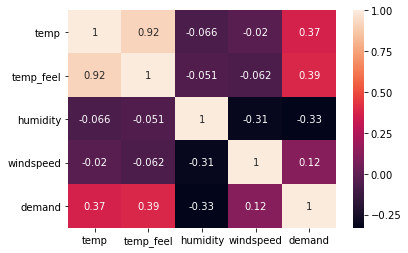

In [21]:
sb.heatmap(corre_metrics, annot=True)
plt.show()

> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `demand` variable. Submit a CSV file with a header row and one row per test entry.
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **demand**

In [22]:
from sklearn import preprocessing, metrics, linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

Trying Linear Regression model

In [23]:
#Split input variable and output variable.
X = data[['temp', 'temp_feel', 'humidity', 'windspeed', 'season', 'holiday' , 'workingday','weather']]
Y = data.iloc[:, -1]

In [24]:
#Spliting train test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#Reseting the index for trian and test
x_train.reset_index(inplace=True)
y_train = y_train.reset_index()

x_test.reset_index(inplace=True)
y_test = y_test.reset_index()

In [25]:
# trying with linear regression

lr_model = linear_model.LinearRegression()
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#print accuracy for model and coefficants.
lr = lr_model.score(x_train, y_train)
print('model accuracy', lr)
print('model coefficiants', lr_model.coef_)
print('model coefficiants', lr_model.intercept_)

model accuracy 0.9999997328503002
model coefficiants [[ 1.00000000e+00  2.12329471e-16 -4.93837348e-16  1.99548469e-17
   2.64351075e-16  3.39445431e-16 -1.58868893e-15  3.14340927e-15
  -8.80423952e-18]
 [ 6.70928739e-05  8.11089436e-04  5.56111186e-02 -2.34392702e-02
   9.57549744e-03  7.22479613e-02 -9.84845258e-02 -1.22892729e-01
   6.45100486e-02]]
model coefficiants [-9.09494702e-13  3.97952586e+00]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [28]:
predict = cross_val_predict(lr_model, x_train, y_train, cv=3)
predict

array([[6.88500000e+03, 4.84964404e+00],
       [1.04900000e+03, 3.35628123e+00],
       [8.47000000e+03, 4.84809741e+00],
       ...,
       [5.39000000e+03, 4.53135099e+00],
       [8.60000000e+02, 5.18466205e+00],
       [7.27000000e+03, 4.13541644e+00]])

In [29]:
# Calculating r-sequard and mean sequared metrics to finalize the model.

r2_score = cross_val_score(lr_model, x_train, y_train, cv=3)
print('R2 score', np.average(r2_score))

R2 score 0.999999731051514


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [52]:
#model performance on test data.

lr_pred = lr_model.predict(x_test)
lr_pred

array([[1.22600000e+03, 3.31052985e+00],
       [2.89300000e+03, 5.53216433e+00],
       [6.59600000e+03, 4.33112894e+00],
       ...,
       [7.64000000e+03, 5.68700199e+00],
       [3.31600000e+03, 3.93925057e+00],
       [6.28600000e+03, 3.74843542e+00]])

In [53]:
rmse = math.sqrt(metrics.mean_squared_error(y_test, lr_pred))
mae = metrics.mean_absolute_error(y_test, lr_pred)

print('rmse', rmse)
print('mae', mae)

rmse 0.8869305288740424
mae 0.4816260717550335


Trying DecissionTree Regresser

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_split=2, max_leaf_nodes=10)
dtr

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [39]:
#checking accuracy of the model.
dtr_score = dtr.score(x_train, y_train)
dtr_score

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9874494780110376

In [40]:
predict = cross_val_predict(dtr, x_train, y_train, cv=3)
predict

array([[7.13010397e+03, 4.83609535e+00],
       [8.74466667e+02, 3.71305693e+00],
       [8.17817304e+03, 5.13089727e+00],
       ...,
       [4.89871694e+03, 4.42054901e+00],
       [5.41604167e+02, 3.58946341e+00],
       [7.09733137e+03, 4.93165564e+00]])

In [41]:
# Calculating r-sequard and mean sequared metrics to finalize the model.

r2_score = cross_val_score(dtr, x_train, y_train, cv=3)
print('R2 score', np.average(r2_score))

R2 score 0.9870688178714354


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [54]:
#model performance on test data.

dtr_pred = dtr.predict(x_test)
dtr_pred

array([[1.67650678e+03, 4.23254124e+00],
       [2.73829935e+03, 4.73769847e+00],
       [6.82444675e+03, 4.85703473e+00],
       ...,
       [8.17513260e+03, 5.07414857e+00],
       [3.81679052e+03, 4.58656724e+00],
       [5.97781806e+03, 4.24714544e+00]])

In [55]:
rmse = math.sqrt(metrics.mean_squared_error(y_test, dtr_pred))
mae = metrics.mean_absolute_error(y_test, dtr_pred)

print('rmse', rmse)
print('mae', mae)

rmse 201.33101812161354
mae 120.8397950989333


Trying randomForest Regresser

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=200)
rfg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [46]:
rfg.fit(x_train, y_train)
rfg_score = rfg.score(x_train, y_train)
rfg_score

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9999999602228118

In [48]:
predict = cross_val_predict(rfg, x_train, y_train, cv=3)
predict
r2_score = cross_val_score(dtr, x_train, y_train, cv=3)
print('R2 score', np.average(r2_score))

R2 score 0.9870688178714354


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [57]:
#model performance on test data.

rfg_pred = dtr.predict(x_test)
rfg_pred

array([[1.67650678e+03, 4.23254124e+00],
       [2.73829935e+03, 4.73769847e+00],
       [6.82444675e+03, 4.85703473e+00],
       ...,
       [8.17513260e+03, 5.07414857e+00],
       [3.81679052e+03, 4.58656724e+00],
       [5.97781806e+03, 4.24714544e+00]])

In [58]:
rmse = math.sqrt(metrics.mean_squared_error(y_test, rfg_pred))
mae = metrics.mean_absolute_error(y_test, rfg_pred)

print('rmse', rmse)
print('mae', mae)

rmse 201.33101812161354
mae 120.8397950989333


Compare with all the above three models linear regression having very less mean squared error and mae so finalizing the lr_regression model.

In [78]:
lr_model.fit(X, Y)
test_df = test_data[['temp', 'temp_feel', 'humidity', 'windspeed', 'season', 'holiday' , 'workingday','weather']]
lr_test_pred = lr_model.predict(test_df)
test_data['demand'] = pd.Series(lr_test_pred)

In [79]:
submission_df = test_data[['id', 'demand']]

In [81]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---